# Market Basket Analysis

# Step 1. Business Understading

### Background Information

Care five is a German multinational retail corporation headquartered in Berlin, Germany.
It is the eighth-largest retailer in the world by revenue. It operates a chain of
hypermarkets, groceries stores, and convenience stores, which as of January 2021,
comprises its 12,00 stores in over 30 countries.

### The Research Question

Perform market basket analysis to identify the top 10 products likely to be purchased together in order to help the store maximize revenue.

### Metric of Success

Identify the top 10 products likely to be purchased together.

### The Experimental Design

* Business Understanding
* Import Libraries
* Load & Explore Data
* Process Data
* Generate frequent itemsets
* Generate association rules
* Metric Interpretation & Recommendation

# Step 2. Import Libraries

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Step 3. Load & Explore Data

In [3]:
# load and preview data
df = pd.read_csv('https://bit.ly/30A2gHO')
df.head(10)

,A,Quantity,Transaction,Store,Product
0,30000,2,93194,6,Magazine
1,30001,2,93194,6,Candy Bar
2,30002,2,93194,6,Candy Bar
3,30003,2,93194,6,Candy Bar
4,30004,2,93194,6,Candy Bar
5,30005,2,93197,1,Pencils
6,30006,1,93200,6,Candy Bar
7,30007,1,93200,6,Candy Bar
8,30008,1,93200,6,Candy Bar
9,30009,1,93200,6,Magazine


In [7]:
# check for duplicates
df.duplicated().sum()

0

In [8]:
# check for missing values
df.isna().sum()

A              0
Quantity       0
Transaction    0
Store          0
Product        0
dtype: int64

In [9]:
df.shape

(15001, 5)

In [16]:
# check how many stores there are 
df.Store.unique()

array([ 6,  1,  8,  4,  7,  5, 10,  3,  2,  9])

# Step 4. Process Data

In [13]:
# group the dataframe by Transaction and Product, and display the count of items

df2 = df.groupby(["Transaction","Product", "Store"])['Quantity'].sum().reset_index(name="Count")
df2.head()

,Transaction,Product,Store,Count
0,93194,Candy Bar,6,8
1,93194,Magazine,6,2
2,93197,Pencils,1,2
3,93200,Candy Bar,6,3
4,93200,Magazine,6,1


In [24]:
# consolidate the items into one transaction per row with each item one-hot encoded.

df3 = (df2.groupby(["Transaction","Product"])['Count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Transaction'))

df3.head()

Product,Bow,Candy Bar,Deodorant,Greeting Cards,Magazine,Markers,Pain Reliever,Pencils,Pens,Perfume,Photo Processing,Prescription Med,Shampoo,Soap,Toothbrush,Toothpaste,Wrapping Paper
Transaction,,,,,,,,,,,,,,,,,
93194,0.0,8.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93200,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93206,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0


In [25]:
# use a custom encoding function to convert all the values to 0 or 1. 
# the Apriori algorithm will only take 0's or 1's.

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

df4 = df3.applymap(encode_units)
df4.head()

Product,Bow,Candy Bar,Deodorant,Greeting Cards,Magazine,Markers,Pain Reliever,Pencils,Pens,Perfume,Photo Processing,Prescription Med,Shampoo,Soap,Toothbrush,Toothpaste,Wrapping Paper
Transaction,,,,,,,,,,,,,,,,,
93194,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
93197,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
93200,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
93206,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
93212,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# Step 5. Generate Frequent Itemsets

In [44]:
# generate the frequent itemsets

frequent_itemsets = apriori(df4, min_support=0.02, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.051591,(Bow)
1,0.175736,(Candy Bar)
2,0.152840,(Greeting Cards)
3,0.231936,(Magazine)
4,0.020071,(Pain Reliever)


In [45]:
frequent_itemsets.shape

(25, 2)

# Step 6. Generate Association Rules

In [51]:
# generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Sort
rules.sort_values("confidence", ascending = False, inplace = True)

# Preview the rules
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Greeting Cards),(Candy Bar),0.152840,0.175736,0.046090,0.301556,1.715963,0.019230,1.180144
1,(Candy Bar),(Greeting Cards),0.175736,0.152840,0.046090,0.262267,1.715963,0.019230,1.148330
3,(Pencils),(Candy Bar),0.135147,0.175736,0.035088,0.259626,1.477364,0.011337,1.113308
5,(Toothpaste),(Candy Bar),0.162504,0.175736,0.041481,0.255261,1.452524,0.012923,1.106782
6,(Greeting Cards),(Magazine),0.152840,0.231936,0.037467,0.245136,1.056914,0.002018,1.017487
4,(Candy Bar),(Toothpaste),0.175736,0.162504,0.041481,0.236041,1.452524,0.012923,1.096258
9,(Pencils),(Greeting Cards),0.135147,0.152840,0.029884,0.221122,1.446758,0.009228,1.087668
10,(Greeting Cards),(Toothpaste),0.152840,0.162504,0.033304,0.217899,1.340885,0.008467,1.070829
11,(Toothpaste),(Greeting Cards),0.162504,0.152840,0.033304,0.204941,1.340885,0.008467,1.065531
2,(Candy Bar),(Pencils),0.175736,0.135147,0.035088,0.199662,1.477364,0.011337,1.080609


# Step 7. Metric Interpretation & Recommendation

The top 10 products likely to be purchased together are:

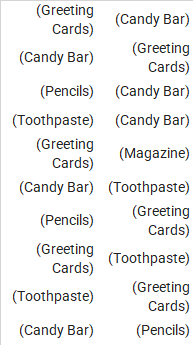

Top association rule metric interpretation, {Greeting Cards} ->	{Candy Bar}
> Support: 4.6% of transactions contain both Greeting Cards and Candy Bar. 

> Confidence: If a customer bought Greeting Cards, there is a 30% chance that they will buy Candy Bar.

> Lift: the rule has a lift of 1.715963, which  implies a positive relationship between Greeting Cards and Candy Bar. It is more likely that Greeting Cards and Candy Bar will be bought together than each individually.

10th association rule metric interpretation, {Candy Bar} -> {Pencils}

> Support: 3.5% of transactions contain both Candy Bar and Pencils. 

> Confidence: If a customer bought Candy Bar, there is a 19% chance that they will buy Pencils.

> Lift: the rule has a lift of 1.477364, which  implies a positive relationship between Candy Bar and Pencils. It is more likely that Candy Bar and Pencils will be bought together than each individually.